# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    for idx, data in enumerate(batch):  
        # Open the image
        image = data['image'].numpy()
        width, height, _ = image.shape

        # Display the image
        fig, ax = plt.subplots(1, figsize=(10,10))
        ax.imshow(image)

        # Obtain the annotations and bounding boxes
        mapping = {1: 'vehicle', 2:'pedestrian', 4:'cyclist'}
        xmins = []
        xmaxs = []
        ymins = []
        ymaxs = []
        classes_text = []
        classes = []

        color_map = {1: 'r', 2: 'b', 4:'g'}

        for i, each_ann in enumerate(data['groundtruth_boxes'].numpy()):
            xmin, ymin = each_ann[1]*width, each_ann[0]*width
            xmax, ymax = each_ann[3]*height, each_ann[2]*height
            xmins.append(xmin)
            xmaxs.append(xmax)
            ymins.append(ymin)
            ymaxs.append(ymax)
            classes.append(data['groundtruth_classes'][i].numpy())
            classes_text.append(mapping[data['groundtruth_classes'][i].numpy()])

            rec = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, edgecolor=color_map[data['groundtruth_classes'][i].numpy()], facecolor='none')
            ax.add_patch(rec)
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

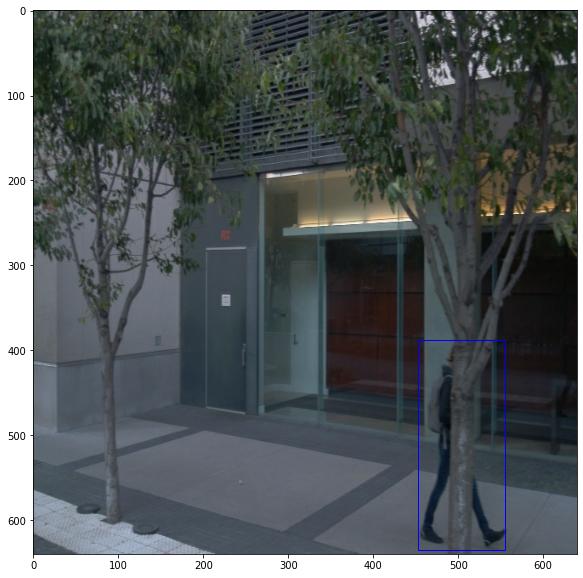

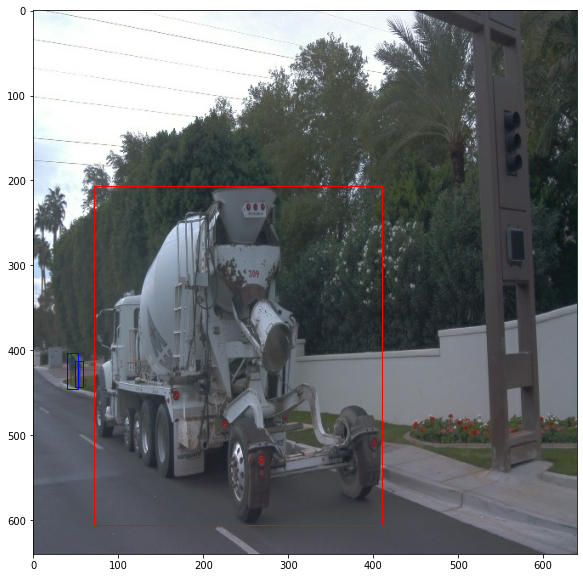

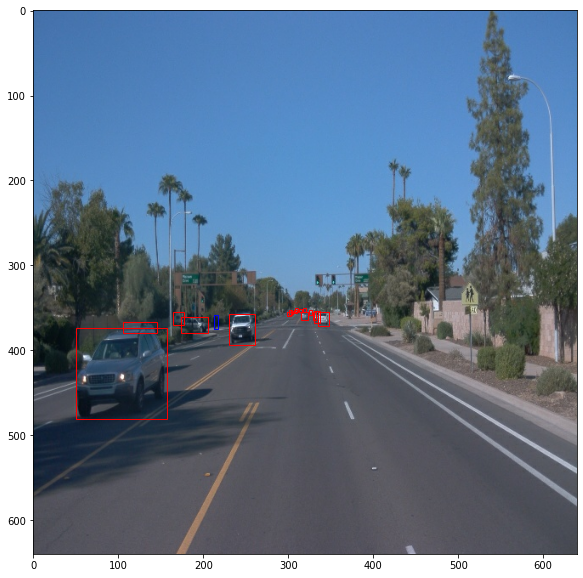

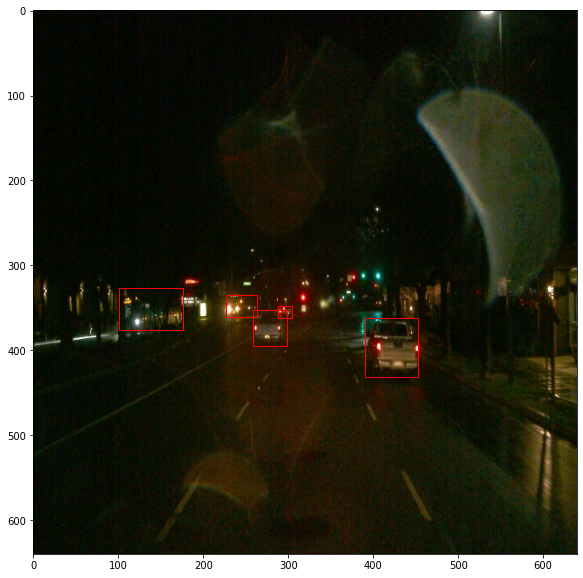

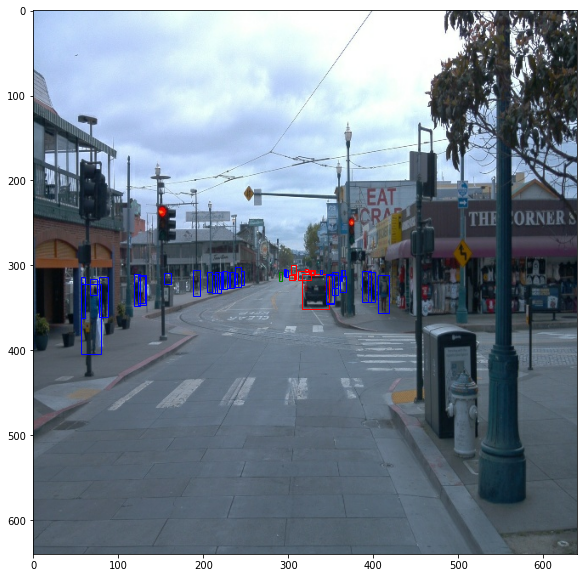

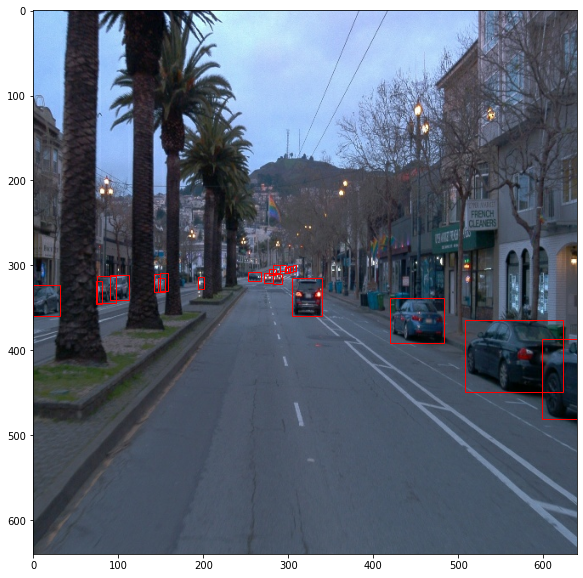

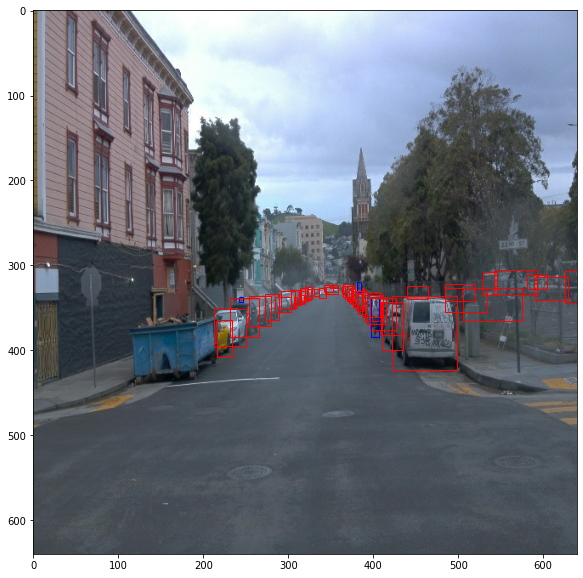

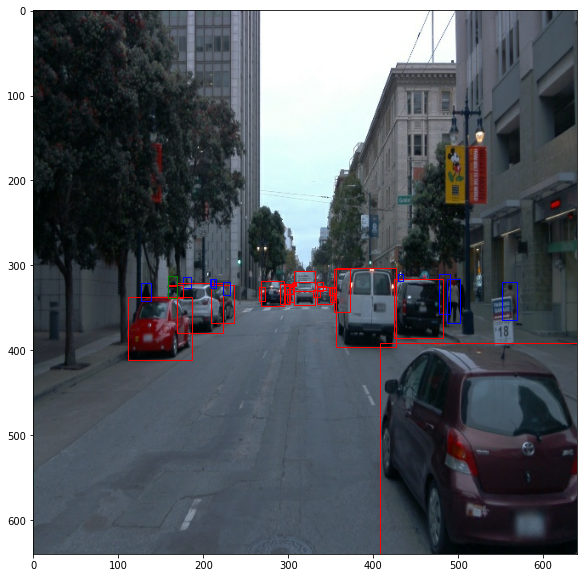

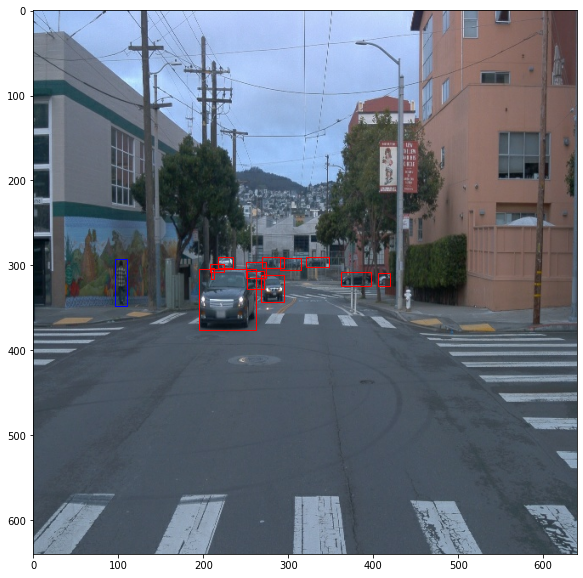

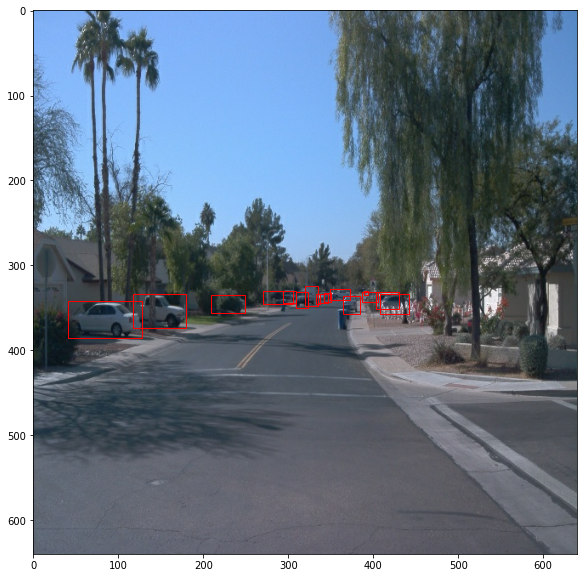

In [4]:
# Display 10 random images in dataset
batch = dataset.shuffle(86).take(10)

display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10
[17332, 5270, 150]


(0.0, 100.0)

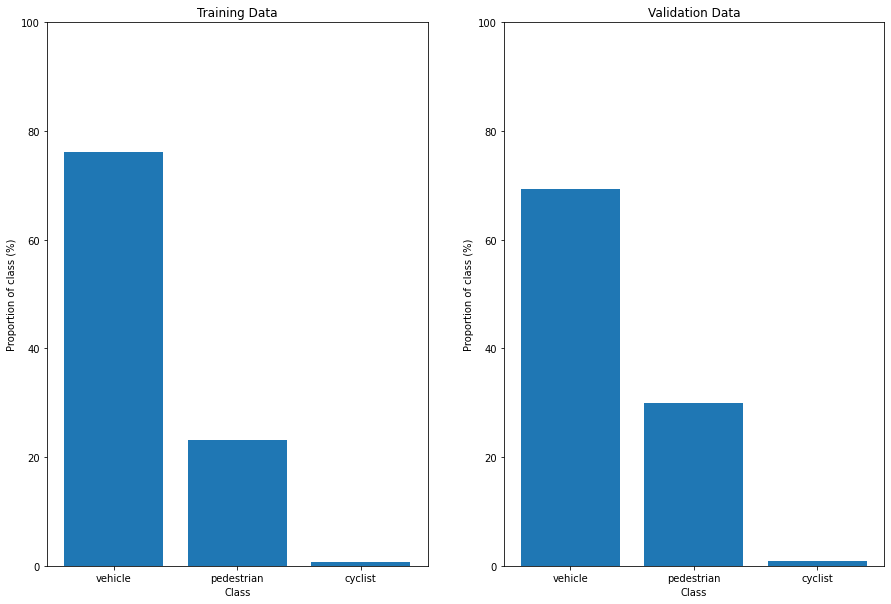

In [23]:
def count_class(dataset):
    classes_count = {}
    for idx, data in enumerate(dataset): 
        # Only for the first few data
        if idx == 1000:
            break
            
        # Obtain the annotations and bounding boxes
        mapping = {1: 'vehicle', 2:'pedestrian', 4:'cyclist'}
        for i, each_ann in enumerate(data['groundtruth_boxes'].numpy()):
            class_text = mapping[data['groundtruth_classes'][i].numpy()]
            if class_text in classes_count:
                classes_count[class_text] += 1
            else:
                classes_count[class_text] = 1
    return classes_count
                
train_dataset = get_dataset("/home/workspace/data/train/*.tfrecord")
val_dataset = get_dataset("/home/workspace/data/val/*.tfrecord")
train_dist = count_class(train_dataset)
val_dist = count_class(val_dataset)

print(list(train_dist.values()))

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].bar(list(train_dist.keys()), [val/sum(list(train_dist.values()))*100 for val in list(train_dist.values())])
ax[0].set_title('Training Data')
ax[0].set_ylabel('Proportion of class (%)')
ax[0].set_xlabel('Class')
ax[0].set_ylim([0, 100])
ax[1].bar(list(val_dist.keys()), [val/sum(list(val_dist.values()))*100 for val in list(val_dist.values())])
ax[1].set_title('Validation Data')
ax[1].set_ylabel('Proportion of class (%)')
ax[1].set_xlabel('Class')
ax[1].set_ylim([0, 100])